- Create the beeswarm plot.
- Label the axes.
- Show the plot.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df1 = pd.read_csv("finch_beaks_1975.csv")
df2 = pd.read_csv("finch_beaks_2012.csv")
df1['year'] = 1975
df2['year'] = 2012
df2.columns = ['band', 'species', 'Beak length, mm', 'Beak depth, mm', 'year']
print(df1.columns)
print(df2.columns)

df = pd.concat([df1, df2], ignore_index=True, axis=0)
print(df.columns)

Index(['band', 'species', 'Beak length, mm', 'Beak depth, mm', 'year'], dtype='object')
Index(['band', 'species', 'Beak length, mm', 'Beak depth, mm', 'year'], dtype='object')
Index(['band', 'species', 'Beak length, mm', 'Beak depth, mm', 'year'], dtype='object')


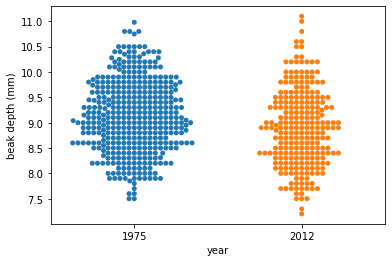

In [12]:
# Create bee swarm plot
_ = sns.swarmplot(x = 'year' , y = 'Beak depth, mm', data = df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

- Compute the ECDF for the 1975 and 2012 data.
- Plot the two ECDFs.
- Set a 2% margin and add axis labels and a legend to the plot.
- Hit submit to view the plot!

In [13]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


- Compute the ECDF for the 1975 and 2012 data.
- Plot the two ECDFs.
- Set a 2% margin and add axis labels and a legend to the plot.
- Hit submit to view the plot!

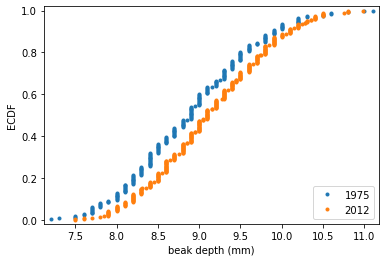

In [20]:
bd_1975 = np.array(df2['Beak depth, mm'])
bd_2012 = np.array(df1['Beak depth, mm'])
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

- Compute the difference of the sample means.
- Take 10,000 bootstrap replicates of the mean for the 1975 beak depths using your draw_bs_reps() function. Also get 10,000 bootstrap replicates of the mean for the 2012 beak depths.
- Subtract the 1975 replicates from the 2012 replicates to get bootstrap replicates of the difference of means.
- Use the replicates to compute the 95% confidence interval.
- Hit submit to view the results!

In [16]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [17]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


In [21]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975) 

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates =  bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5,97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22313275434243174 mm
95% confidence interval = [0.10447146 0.33848123] mm


- Make a concatenated array of the 1975 and 2012 beak depths and compute and store its mean.
- Shift bd_1975 and bd_2012 such that their means are equal to the one you just computed for the combined data set.
- Take 10,000 bootstrap replicates of the mean each for the 1975 and 2012 beak depths.
- Subtract the 1975 replicates from the 2012 replicates to get bootstrap replicates of the difference.
- Compute and print the p-value. The observed difference in means you computed in the last exercise is still in your namespace as mean_diff.

In [22]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)


p = 0.0


- Make a scatter plot of the 1975 data. Use the color='blue' keyword argument. Also use an alpha=0.5 keyword argument to have transparency in case data points overlap.
- Do the same for the 2012 data, but use the color='red' keyword argument.
- Add a legend and label the axes.
- Show your plot.

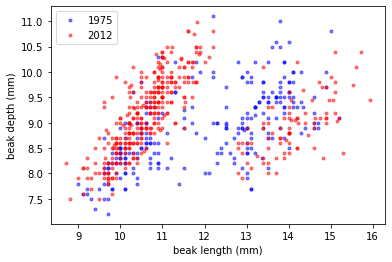

In [23]:
bl_1975 = np.array(df2['Beak length, mm'])
bl_2012 = np.array(df1['Beak length, mm'])

# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='None', alpha=0.5, color='blue')

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='None', alpha=0.5, color='red')

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

- Compute the slope and intercept for both the 1975 and 2012 data sets.
- Obtain 1000 pairs bootstrap samples for the linear regressions using your draw_bs_pairs_linreg() function.
- Compute 95% confidence intervals for the slopes and the intercepts.

In [24]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0,len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y,1)

    return bs_slope_reps, bs_intercept_reps


In [25]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012,1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975 ,[2.5,97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012 ,[2.5,97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975 ,[2.5,97.5])

intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012 ,[2.5,97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.27942148396112504 conf int = [0.23873292 0.32053615]
1975: intercept = 5.548559204612315 conf int = [5.07085028 6.03765074]
2012: slope = 0.0945968320892116 conf int = [0.05223252 0.13396154]
2012: intercept = 8.053907980716424 conf int = [7.61483002 8.53549257]


- Generate the -values for the bootstrap lines using np.array(). They should consist of 10 mm and 17 mm.
- Write a for loop to plot 100 of the bootstrap lines for the 1975 and 2012 data sets. The lines for the 1975 data set should be 'blue' and those for the 2012 data set should be 'red'.
- Hit submit to view the plot!

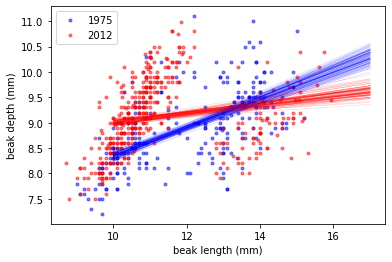

In [26]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x,  bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

- Make arrays of the beak length to depth ratio of each bird for 1975 and for 2012.
- Compute the mean of the length to depth ratio for 1975 and for 2012.
- Generate 10,000 bootstrap replicates each for the mean ratio for 1975 and 2012 using your draw_bs_reps() function.
- Get a 99% bootstrap confidence interval for the length to depth ratio for 1975 and 2012.
- Print the results.

In [27]:
# Compute length-to-depth ratios
ratio_1975 =   bl_1975/ bd_1975
ratio_2012 =   bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)


1975: mean ratio = 1.3483617710027853 conf int = [1.3245612 1.3724084]
2012: mean ratio = 1.2461609991094327 conf int = [1.22319196 1.27075111]


In the previous exercise, you computed the mean beak length to depth ratio with 99% confidence intervals for 1975 and for 2012. The results of that calculation are shown graphically in the plot accompanying this problem. In addition to these results, what would you say about the ratio of beak length to depth?
- The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

- Generate scatter plots for both species. Display the data for G. fortis in blue and G. scandens in red.
- Set the axis labels, make a legend, and show the plot.

In [29]:
fortis = pd.read_csv("fortis_beak_depth_heredity.csv")
scandens = pd.read_csv("scandens_beak_depth_heredity.csv")
print(fortis.columns)
print(scandens.columns)

Index(['Mid-offspr', 'Male BD', 'Female BD'], dtype='object')
Index(['mid_parent', 'mid_offspring'], dtype='object')


In [30]:

# # bd_parent_fortis = 
# # bd_offspring_fortis = 
# # bd_parent_scandens = 
# # bd_offspring_scandens = 

# # Make scatter plots

# _ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
#              marker='.', linestyle='none', color='blue', alpha=0.5)
# _ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
#              marker='.', linestyle='none', color='red', alpha=0.5)

# # Label axes
# _ = plt.xlabel('parental beak depth (mm)')
# _ = plt.ylabel('offspring beak depth (mm)')

# # Add legend
# _ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# # Show plot
# plt.show()


- Set up an array of indices to sample from. (Remember, when doing pairs bootstrap, we randomly choose indices and use those to get the pairs.)
- Initialize the array of bootstrap replicates. This should be a one-dimensional array of length size.
- Write a for loop to draw the samples.
- Randomly choose indices from the array of indices you previously set up.
- Extract x values and y values from the input array using the indices you just chose to generate a bootstrap sample.
- Use func to compute the statistic of interest from the bootstrap samples of x and y and store it in your array of bootstrap replicates.
- Return the array of bootstrap replicates.

In [31]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds) ,replace = False)
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

- Use the pearson_r() function you wrote in the prequel to this course to compute the Pearson correlation coefficient for G. scandens and G. fortis.
- Acquire 1000 pairs bootstrap replicates of the Pearson correlation coefficient using the draw_bs_pairs() function you wrote in the previous exercise for G. scandens and G. fortis.
- Compute the 95% confidence interval for both using your bootstrap replicates.

In [32]:
# # Compute the Pearson correlation coefficients
# r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
# r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# # Acquire 1000 bootstrap replicates of Pearson r
# bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)

# bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, 1000)


# # Compute 95% confidence intervals
# conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5,97.5])
# conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5,97.5])

# # Print results
# print('G. scandens:', r_scandens, conf_int_scandens)
# print('G. fortis:', r_fortis, conf_int_fortis)


- Write a function heritability(parents, offspring) that computes heritability defined as the ratio of the covariance of the trait in parents and offspring divided by the variance of the trait in the parents. Hint: Remind yourself of the np.cov() function we covered in the prequel to this course.
- Use this function to compute the heritability for G. scandens and G. fortis.
- Acquire 1000 bootstrap replicates of the heritability using pairs bootstrap for G. scandens and G. fortis.
- Compute the 95% confidence interval for both using your bootstrap replicates.
- Print the results.

In [33]:
# def heritability(parents, offspring):
#     """Compute the heritability from parent and offspring samples."""
#     covariance_matrix = np.cov(parents, offspring)
#     return covariance_matrix[0,1] / covariance_matrix[0,0]

# # Compute the heritability
# heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
# heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# # Acquire 1000 bootstrap replicates of heritability
# replicates_scandens = draw_bs_pairs(
#         bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
# replicates_fortis = draw_bs_pairs(
#         bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# # Compute 95% confidence intervals
# conf_int_scandens = np.percentile(replicates_scandens , [2.5,97.5])
# conf_int_fortis = np.percentile(replicates_fortis , [2.5,97.5])

# # Print results
# print('G. scandens:', heritability_scandens, conf_int_scandens)
# print('G. fortis:', heritability_fortis, conf_int_fortis)


- Initialize your array of replicates of heritability. We will take 10,000 pairs permutation replicates.
- Write a for loop to generate your replicates.
- Permute the bd_parent_scandens array using np.random.permutation().
- Compute the heritability between the permuted array and the bd_offspring_scandens array using the heritability() function you wrote in the last exercise. Store the result in the replicates array.
- Compute the p-value as the number of replicates that are greater than the observed heritability_scandens you computed in the last exercise.

In [34]:
# # Initialize array of replicates: perm_replicates
# perm_replicates = np.empty(10000)

# # Draw replicates
# for i in range(10000):
#     # Permute parent beak depths
#     bd_parent_permuted = np.random.permutation(bd_parent_scandens)
#     perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# # Compute p-value: p
# p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# # Print the p-value
# print('p-val =', p)
